In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,1,2,3,4]]
data.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data['date'] = pd.to_datetime(data['timestamp'], unit='s')
data = data.iloc[:, [0,5,1,2,3,4]]

data_backup = data.loc[ data.timestamp >= 1675814400 ]
data = data.loc[ data.timestamp < 1675814400 ]

from talib import RSI
data['rsi_14'] = RSI(data['close'], timeperiod=14)
data['rsi_14'] = data['rsi_14'].shift(1)

from talib import MA, SMA, EMA, WMA
data['ma_9'] = MA(data['close'], timeperiod=9)
data['ma_9'] = data['ma_9'].shift(1)
data['sma_9'] = SMA(data['close'], timeperiod=9)
data['sma_9'] = data['sma_9'].shift(1)
data['wma_9'] = WMA(data['close'], timeperiod=9)
data['wma_9'] = data['wma_9'].shift(1)

from talib import MACD
data['macd'], data['signal'], data['hist'] = MACD(data['close'])
data['macd'] = data['macd'].shift(1)
data['signal'] = data['signal'].shift(1)
data['hist'] = data['hist'].shift(1)

from talib import ADX
data['adx'] = ADX(data['high'], data['low'], data['close'])
data['adx'] = data['adx'].shift(1)

from talib import ATR
data['atr'] = ATR(high=data['high'], low=data['low'], close=data['close'], timeperiod=14)
data['atr'] = data['atr'].shift(1)

from talib import SAR
data['sar'] = SAR(high=data['high'], low=data['low'], acceleration=0.02, maximum=0.2)
data['sar'] = data['sar'].shift(1)

from talib import TEMA
data['tema'] = TEMA(data['close'], timeperiod=14)
data['tema'] = data['tema'].shift(1)

from talib import ROC
data['roc'] = ROC(data['close'], timeperiod=14)
data['roc'] = data['roc'].shift(1)

data.dropna(axis=0, inplace=True)

In [2]:
data

,timestamp,date,open,high,low,close,rsi_14,ma_9,sma_9,wma_9,macd,signal,hist,adx,atr,sar,tema,roc
40,1612933200,2021-02-10 05:00:00,1791.28,1806.86,1786.77,1801.76,67.907521,1775.944444,1775.944444,1790.037556,28.303757,26.297381,2.006376,47.286223,32.934890,1723.703040,1807.077405,4.421765
41,1612936800,2021-02-10 06:00:00,1801.76,1831.76,1801.76,1806.96,63.749055,1783.164444,1783.164444,1795.200667,28.079370,26.653779,1.425591,46.570772,32.604540,1728.050918,1809.322278,2.459469
42,1612940400,2021-02-10 07:00:00,1806.99,1823.97,1805.00,1816.73,64.658924,1790.123333,1790.123333,1799.959778,27.998391,26.922702,1.075689,46.432716,32.418502,1732.224882,1812.316384,4.220234
43,1612944000,2021-02-10 08:00:00,1816.73,1848.00,1795.19,1810.23,66.366977,1797.010000,1797.010000,1805.281111,28.395248,27.217211,1.178037,46.304521,31.457894,1736.231886,1817.487805,4.225279
44,1612951200,2021-02-10 10:00:00,1796.13,1815.21,1786.31,1798.95,64.145750,1801.426667,1801.426667,1807.925111,27.864066,27.346582,0.517484,46.644941,32.983045,1740.078611,1818.619406,2.840538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16257,1675792800,2023-02-07 18:00:00,1672.03,1679.03,1625.48,1638.52,51.458206,1636.478889,1636.478889,1637.984667,0.143972,-1.273106,1.417078,15.085779,11.846988,1647.080000,1639.763830,-0.535584
16258,1675796400,2023-02-07 19:00:00,1638.52,1658.48,1637.64,1656.42,51.870094,1637.107778,1637.107778,1638.392889,0.320562,-0.954372,1.274934,15.641530,14.825775,1602.000000,1639.989502,0.016481
16259,1675800000,2023-02-07 20:00:00,1656.43,1668.77,1650.16,1664.93,63.059562,1639.923333,1639.923333,1642.255333,1.883183,-0.386861,2.270044,16.157585,15.255362,1603.540600,1646.345364,2.634612
16260,1675803600,2023-02-07 21:00:00,1664.86,1674.72,1663.76,1667.43,66.988870,1643.332222,1643.332222,1647.256667,3.764859,0.443483,3.321376,17.191980,15.494979,1605.050388,1653.999136,2.782339


In [3]:
best_features = ('close', 'ma_9', 'sma_9', 'macd', 'signal', 'hist', 'adx', 'atr', 'sar', 'tema', 'roc')

In [4]:
data_input = data[list(best_features)]
data_target = data[['close']]

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_input)

scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(data_target)

In [6]:
seq_length = 4  # Number of time steps in each sequence
num_features = data_input.shape[1]
X_features = data_scaled
y_target = target_scaled

In [7]:
import numpy as np

# Create input sequences and targets
def create_sequences(features, target, seq_length):
    X_seq = []
    y_seq = []
    for i in range(len(features) - seq_length):
        X_seq.append(features[i:i+seq_length])  # Input sequence
        y_seq.append(target[i+seq_length]) # Target value (next data point)
    return np.array(X_seq), np.array(y_seq)

In [8]:
X_seq, y_seq = create_sequences(X_features, y_target, seq_length)

# Reshape X_seq to fit LSTM model input shape
X_seq = X_seq.reshape(X_seq.shape[0], seq_length, num_features)

In [9]:
X_seq.shape

(16218, 4, 11)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build LSTM model
model = Sequential([
    LSTM(25, input_shape=(seq_length, num_features)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with early stopping
model.fit(X_seq, y_seq, epochs=100, batch_size=45, validation_split=0.2, callbacks=[early_stopping])

2024-04-05 06:51:23.765210: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 06:51:25.305680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 06:51:25.305929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 06:51:25.451971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-05 06:51:26.171850: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 06:51:31.146456: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

Epoch 1/100
289/289 [==============================] - 5s 7ms/step - loss: 0.0113 - val_loss: 1.7645e-04
Epoch 2/100
289/289 [==============================] - 1s 5ms/step - loss: 3.9661e-04 - val_loss: 9.8208e-05
Epoch 3/100
289/289 [==============================] - 1s 5ms/step - loss: 2.4385e-04 - val_loss: 5.8635e-05
Epoch 4/100
289/289 [==============================] - 1s 5ms/step - loss: 2.0823e-04 - val_loss: 5.0204e-05
Epoch 5/100
289/289 [==============================] - 1s 5ms/step - loss: 1.9385e-04 - val_loss: 3.8178e-05
Epoch 6/100
289/289 [==============================] - 2s 6ms/step - loss: 1.7791e-04 - val_loss: 3.3231e-05
Epoch 7/100
289/289 [==============================] - 2s 5ms/step - loss: 1.6612e-04 - val_loss: 3.2971e-05
Epoch 8/100
289/289 [==============================] - 2s 5ms/step - loss: 1.5486e-04 - val_loss: 2.7987e-05
Epoch 9/100
289/289 [==============================] - 2s 5ms/step - loss: 1.4934e-04 - val_loss: 2.5066e-05
Epoch 10/100
289/289 [=

In [11]:
from talib import RSI
data_backup['rsi_14'] = RSI(data_backup['close'], timeperiod=14)
data_backup['rsi_14'] = data_backup['rsi_14'].shift(1)

from talib import MA, SMA, EMA, WMA
data_backup['ma_9'] = MA(data_backup['close'], timeperiod=9)
data_backup['ma_9'] = data_backup['ma_9'].shift(1)
data_backup['sma_9'] = SMA(data_backup['close'], timeperiod=9)
data_backup['sma_9'] = data_backup['sma_9'].shift(1)
data_backup['wma_9'] = WMA(data_backup['close'], timeperiod=9)
data_backup['wma_9'] = data_backup['wma_9'].shift(1)

from talib import MACD
data_backup['macd'], data_backup['signal'], data_backup['hist'] = MACD(data_backup['close'])
data_backup['macd'] = data_backup['macd'].shift(1)
data_backup['signal'] = data_backup['signal'].shift(1)
data_backup['hist'] = data_backup['hist'].shift(1)

from talib import ADX
data_backup['adx'] = ADX(data_backup['high'], data_backup['low'], data_backup['close'])
data_backup['adx'] = data_backup['adx'].shift(1)

from talib import ATR
data_backup['atr'] = ATR(high=data_backup['high'], low=data_backup['low'], close=data_backup['close'], timeperiod=14)
data_backup['atr'] = data_backup['atr'].shift(1)

from talib import SAR
data_backup['sar'] = SAR(high=data_backup['high'], low=data_backup['low'], acceleration=0.02, maximum=0.2)
data_backup['sar'] = data_backup['sar'].shift(1)

from talib import TEMA
data_backup['tema'] = TEMA(data_backup['close'], timeperiod=14)
data_backup['tema'] = data_backup['tema'].shift(1)

from talib import ROC
data_backup['roc'] = ROC(data_backup['close'], timeperiod=14)
data_backup['roc'] = data_backup['roc'].shift(1)

data_backup.dropna(axis=0, inplace=True)

In [12]:
data_backup_scaled = scaler.transform(data_backup[list(best_features)])
target_backup_scaled = scaler_target.transform(data_backup[['close']])
X_b, y_b = create_sequences(data_backup_scaled, target_backup_scaled, seq_length)
X_b = X_b.reshape(X_b.shape[0], seq_length, num_features)

In [13]:
y_pred = model.predict(X_b)
y_pred = scaler_target.inverse_transform(y_pred)

252/252 [==============================] - 1s 3ms/step


In [14]:
y_pred

array([[1545.694 ],
       [1547.4303],
       [1546.3223],
       ...,
       [2429.2397],
       [2423.506 ],
       [2422.3286]], dtype=float32)

In [20]:
y_pred[2][0]

1546.3223

In [15]:
data_backup.reset_index(inplace=True)

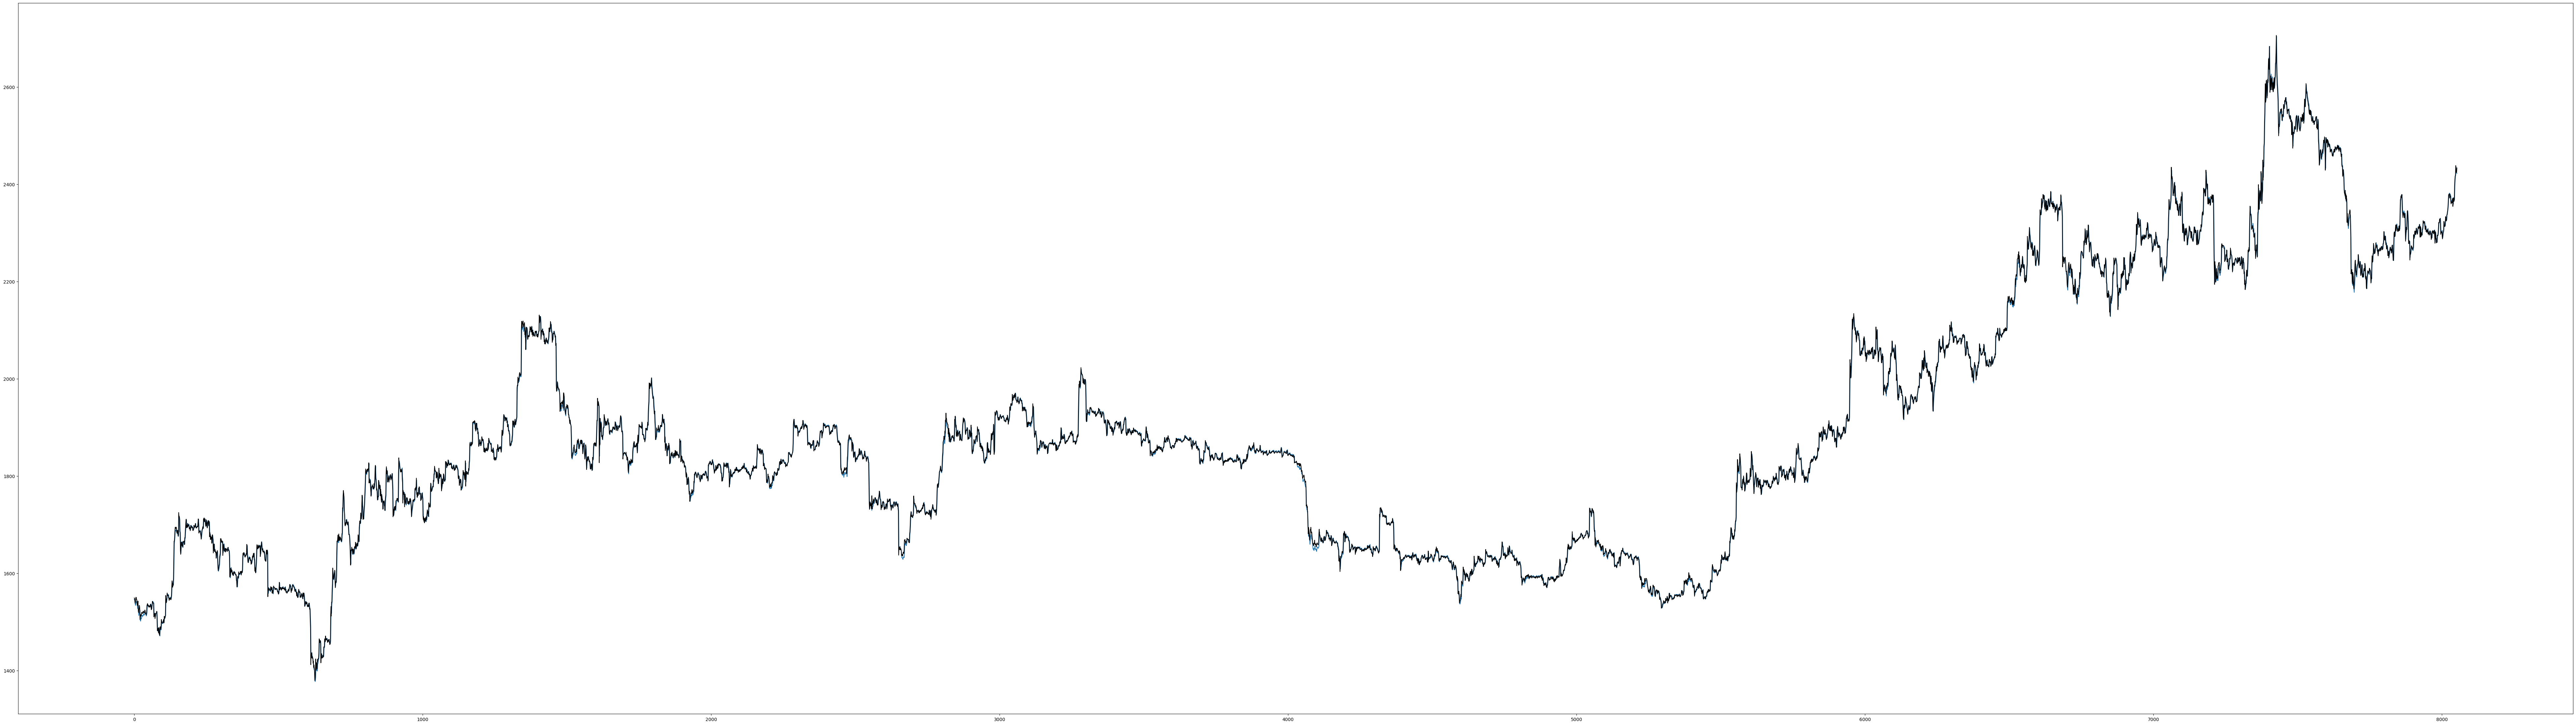

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_pred)
plt.plot(data_backup[['close']].shift(-seq_length).values, color='black')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, accuracy_score

mean_squared_error(data_backup[['close']].iloc[seq_length:], y_pred)

102.85371575951082

In [18]:
y_pred_series = pd.Series(y_pred.reshape(1,-1)[0])
data_backup['y_pred'] = y_pred_series
data_backup.to_excel('lstm-multiple-factor-2.xlsx')

In [21]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)